# Practical 2-A

In [22]:
import numpy as np


In [23]:
input_array = np.array([[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7]])
output_array = np.array([[1.2],[1.4],[1.55],[1.75],[2.01],[2.2],[2.35]])

In [24]:
def neuron_training(x,target):
    #initializing the weight
    w=np.random.randn(1,2)
    eta=0.1
    epoch=0
    Etotal=1
    Erequired=0.1
    while(Etotal>Erequired and epoch<100):
        Etotal=0
        epoch=epoch+1
        for i in range(len(x)):

            #forward pass
            input=x[i]
            d=target[i]
            new_input=np.append(input,1)
            y=np.dot(w,new_input)

            #Gradient descent
            error = 0.5*(d-y)**2
            Etotal=Etotal+error
            # print("Error: ",Etotal,"\n")
            delta_w=eta*(d-y)*input
            w=w+delta_w

        Etotal=Etotal/7
       
    return w,epoch


In [25]:
#Training the neuron
output=neuron_training(input_array,output_array)
weight=output[0]
epoch=output[1]
print("Final weight: ",weight)
if epoch == 100:
    print("Epoch limit reached")
    print ("Problem cannot be solved with one neuron")
        
else:
    print("Epoch = ",epoch)
    print ("Problem solved with one neuron") 



Final weight:  [[0.19421074 1.65433752]]
Epoch =  6
Problem solved with one neuron


In [26]:
#predicting the output
def neuron_predict(x,w):
    input=np.append(x,1)
    y=np.dot(w,input)
    return y


#predicting the output
input=0.8
output=neuron_predict(input,weight)
print("Output for input ",input," is ",output)

Output for input  0.8  is  [1.80970612]


# 2-B

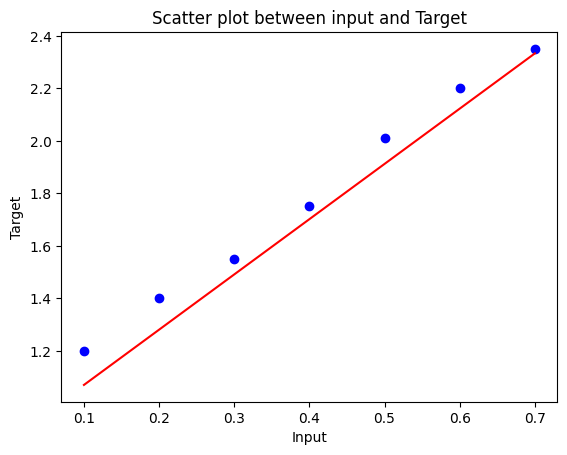

In [33]:
#plotting the graph

import matplotlib.pyplot as plt

point =(1.41624142,1.28166095)
x=2.35204989
y= 0.81558936

#plt.scatter(x,y,c="red")
line_plot=np.linspace(0.1,0.7,100)
#y=mx+c
line=2.10486436*line_plot+0.85953786
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Scatter plot between input and Target')
plt.scatter(input_array,output_array, c ="blue")
plt.plot(line_plot,line,c='r')

plt.show()



In [28]:
#Linear Regression
internal_exam= np.array (([15],[23],[18],[23],[24],[22],[22]))
final_exam= np.array (([49],[63],[58],[60],[58],[61],[60]))

In [29]:
#Training the neuron
output=neuron_training(internal_exam,final_exam)
weight=output[0]
epoch=output[1]
print("Final weight: ",weight)
if epoch == 100:
    print("Epoch limit reached")
    print ("Problem cannot be solved with one neuron")
        
else:
    print("Epoch = ",epoch)
    print ("Problem solved with one neuron") 

Final weight:  [[nan nan]]
Epoch =  28
Problem solved with one neuron


C:\Users\HP\AppData\Local\Temp\ipykernel_13744\4200006243.py:20: RuntimeWarning: overflow encountered in square
  error = 0.5*(d-y)**2
C:\Users\HP\AppData\Local\Temp\ipykernel_13744\4200006243.py:24: RuntimeWarning: invalid value encountered in add
  w=w+delta_w
